# Import Data & Python Packages

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import Data yang akan di analisis

In [78]:
app_train = pd.read_csv('app_train.csv',sep = ',')
app_train.head()

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,201468,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,...,-11539,-921,-119.0,-2757,TUESDAY,18,Business Entity Type 3,0.572805,0.608276,NaN
1,264803,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,...,-15743,-4482,-1797.0,-2455,TUESDAY,14,Other,0.655600,0.684298,NaN
2,137208,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,...,-20775,365243,-8737.0,-4312,THURSDAY,14,NA1,NaN,0.580687,0.749022
3,269220,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,...,-20659,-10455,-4998.0,-4010,WEDNESDAY,10,Culture,NaN,0.623740,0.710674
4,122096,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,...,-9013,-1190,-3524.0,-1644,SUNDAY,11,Construction,0.175511,0.492994,0.085595


In [79]:
print('Jumlah Data Train Ada Sebanyak {}.'.format(app_train.shape[0]))

Jumlah Data Train Ada Sebanyak 61503.


# Data Cleaning

Setelah melihat datanya Saya memutuskan akan menghapus kolom yang menurut saya tidak terlalu berpengaruh

In [80]:
app_train.columns

Index(['Unnamed: 0', 'LN_ID', 'TARGET', 'CONTRACT_TYPE', 'GENDER',
       'NUM_CHILDREN', 'INCOME', 'APPROVED_CREDIT', 'ANNUITY', 'PRICE',
       'INCOME_TYPE', 'EDUCATION', 'FAMILY_STATUS', 'HOUSING_TYPE', 'DAYS_AGE',
       'DAYS_WORK', 'DAYS_REGISTRATION', 'DAYS_ID_CHANGE', 'WEEKDAYS_APPLY',
       'HOUR_APPLY', 'ORGANIZATION_TYPE', 'EXT_SCORE_1', 'EXT_SCORE_2',
       'EXT_SCORE_3'],
      dtype='object')

In [81]:
column1_drop = ['Unnamed: 0','LN_ID','ANNUITY', 'PRICE','DAYS_REGISTRATION', 'DAYS_ID_CHANGE','WEEKDAYS_APPLY', 'HOUR_APPLY','ORGANIZATION_TYPE','EXT_SCORE_1','EXT_SCORE_2','EXT_SCORE_3']
dataku = app_train.drop(column1_drop, axis = 1)

In [82]:
dataku.head()

,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,DAYS_AGE,DAYS_WORK
0,0,Revolving loans,F,1,67500.0,202500.0,Working,Secondary / secondary special,Married,With parents,-11539,-921
1,0,Cash loans,F,1,202500.0,976711.5,Commercial associate,Secondary / secondary special,Married,House / apartment,-15743,-4482
2,0,Cash loans,F,0,180000.0,407520.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20775,365243
3,0,Cash loans,M,0,225000.0,808650.0,State servant,Higher education,Married,House / apartment,-20659,-10455
4,0,Revolving loans,M,0,135000.0,180000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-9013,-1190


In [83]:
dataku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61503 entries, 0 to 61502
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TARGET           61503 non-null  int64  
 1   CONTRACT_TYPE    61503 non-null  object 
 2   GENDER           61503 non-null  object 
 3   NUM_CHILDREN     61503 non-null  int64  
 4   INCOME           61503 non-null  float64
 5   APPROVED_CREDIT  61503 non-null  float64
 6   INCOME_TYPE      61503 non-null  object 
 7   EDUCATION        61503 non-null  object 
 8   FAMILY_STATUS    61503 non-null  object 
 9   HOUSING_TYPE     61503 non-null  object 
 10  DAYS_AGE         61503 non-null  int64  
 11  DAYS_WORK        61503 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 5.6+ MB


Setelah di Lihat Tidak Ada Data Yang Missing

In [84]:
dataku.describe()

,TARGET,NUM_CHILDREN,INCOME,APPROVED_CREDIT,DAYS_AGE,DAYS_WORK
count,61503.000000,61503.000000,6.150300e+04,6.150300e+04,61503.000000,61503.000000
mean,0.080793,0.411850,1.690789e+05,5.976899e+05,-16057.481033,64882.262768
std,0.272519,0.716686,1.339697e+05,4.016493e+05,4363.536919,142154.440320
min,0.000000,0.000000,2.610000e+04,4.500000e+04,-25229.000000,-17912.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,-19716.500000,-2761.000000
50%,0.000000,0.000000,1.485000e+05,5.124465e+05,-15753.000000,-1208.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,-12450.000000,-276.000000
max,1.000000,9.000000,1.800009e+07,4.050000e+06,-7673.000000,365243.000000


Setelah di lihat pada kolom DAYS_WORK terdapat angka yang cukup aneh

In [85]:
(dataku['DAYS_WORK'] == 365243).value_counts()

False    50250
True     11253
Name: DAYS_WORK, dtype: int64

setelah ditelusuri ternyata ada cukup banyak yang memiliki angka yang serupa. Jika data tersebut di hapus saya takut akan sangat mempengaruhi pengujian nantinya maka saya memilih untuk mengganti nilai tersebut 

In [86]:
datafill = dataku[dataku['DAYS_WORK']!=365243]

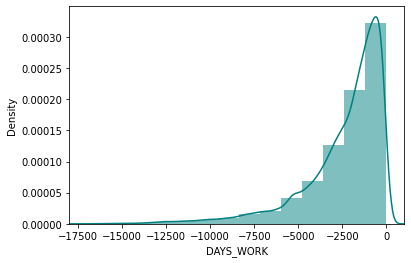

In [87]:
ax = datafill["DAYS_WORK"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.5)
datafill["DAYS_WORK"].plot(kind='density', color='teal')
ax.set(xlabel='DAYS_WORK')
plt.xlim(-18000,1000)
plt.show()

Setelah dilihat ternyata bentuk distribusinya miring ke kiri jadi saya memilih akan menggunakan median untuk mengisi nilai 365243

In [88]:
(datafill['DAYS_WORK']).mean()

-2380.6103880597016

In [89]:
(datafill['DAYS_WORK']).median()

-1644.0

In [90]:
dataku['DAYS_WORK'] = dataku['DAYS_WORK'].replace([365243],-1644)

In [91]:
dataku.describe()

,TARGET,NUM_CHILDREN,INCOME,APPROVED_CREDIT,DAYS_AGE,DAYS_WORK
count,61503.000000,61503.000000,6.150300e+04,6.150300e+04,61503.000000,61503.000000
mean,0.080793,0.411850,1.690789e+05,5.976899e+05,-16057.481033,-2245.835228
std,0.272519,0.716686,1.339697e+05,4.016493e+05,4363.536919,2123.994254
min,0.000000,0.000000,2.610000e+04,4.500000e+04,-25229.000000,-17912.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,-19716.500000,-2761.000000
50%,0.000000,0.000000,1.485000e+05,5.124465e+05,-15753.000000,-1644.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,-12450.000000,-940.000000
max,1.000000,9.000000,1.800009e+07,4.050000e+06,-7673.000000,-3.000000


# Data Eksplorasi

1. Variabel Target

0 Berarti tepat waktu dan 1 Berarti telat bayar
0    56534
1     4969
Name: TARGET, dtype: int64


<AxesSubplot:xlabel='TARGET', ylabel='count'>

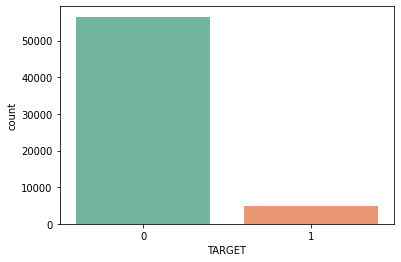

In [92]:
print('0 Berarti tepat waktu dan 1 Berarti telat bayar')
print(dataku['TARGET'].value_counts())
sns.countplot(x='TARGET', data=dataku, palette='Set2')

2. Variabel GENDER

F    40549
M    20954
Name: GENDER, dtype: int64


<AxesSubplot:xlabel='GENDER', ylabel='count'>

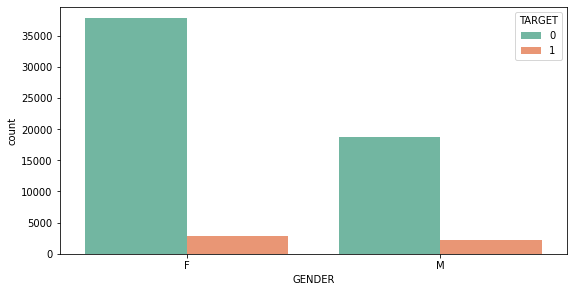

In [93]:
print(dataku['GENDER'].value_counts())
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='GENDER', data=dataku, hue='TARGET', palette='Set2')

3. Variabel INCOME_TYPE

Working                 31621
Commercial associate    14217
Pensioner               11249
State servant            4407
Unemployed                  5
Student                     3
Businessman                 1
Name: INCOME_TYPE, dtype: int64


<AxesSubplot:xlabel='INCOME_TYPE', ylabel='count'>

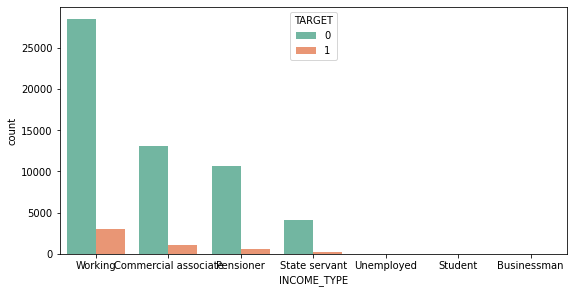

In [94]:
print(dataku['INCOME_TYPE'].value_counts())
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='INCOME_TYPE', data=dataku, hue='TARGET', palette='Set2')

4. Variabel EDUCATION

Secondary / secondary special    43777
Higher education                 14887
Incomplete higher                 2045
Lower secondary                    760
Academic degree                     34
Name: EDUCATION, dtype: int64


<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

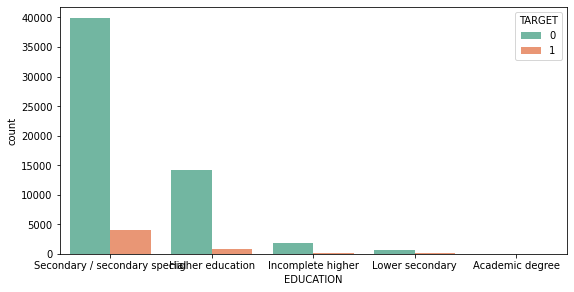

In [95]:
print(dataku['EDUCATION'].value_counts())
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='EDUCATION', data=dataku, hue='TARGET', palette='Set2')

5. Variabel FAMILY_STATUS

Married                 39370
Single / not married     9029
Civil marriage           5881
Separated                3970
Widow                    3253
Name: FAMILY_STATUS, dtype: int64


<AxesSubplot:xlabel='FAMILY_STATUS', ylabel='count'>

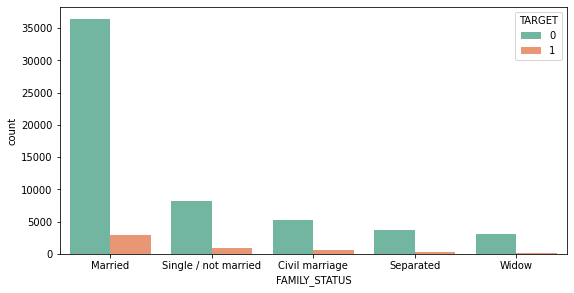

In [96]:
print(dataku['FAMILY_STATUS'].value_counts())
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='FAMILY_STATUS', data=dataku, hue='TARGET', palette='Set2')

6. Variabel HOUSING_TYPE

House / apartment      54648
With parents            2891
Municipal apartment     2203
Rented apartment         988
Office apartment         534
Co-op apartment          239
Name: HOUSING_TYPE, dtype: int64


<AxesSubplot:xlabel='HOUSING_TYPE', ylabel='count'>

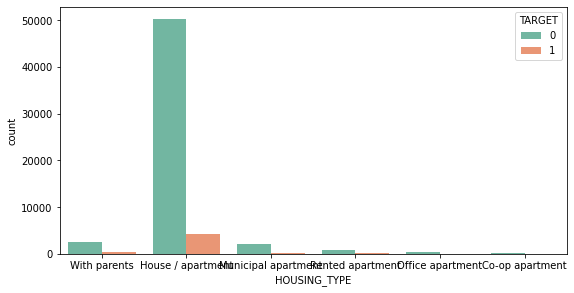

In [97]:
print(dataku['HOUSING_TYPE'].value_counts())
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='HOUSING_TYPE', data=dataku, hue='TARGET', palette='Set2')

Apabila ingin menggabungkan semua grafik menjadi 1 grafik maka 

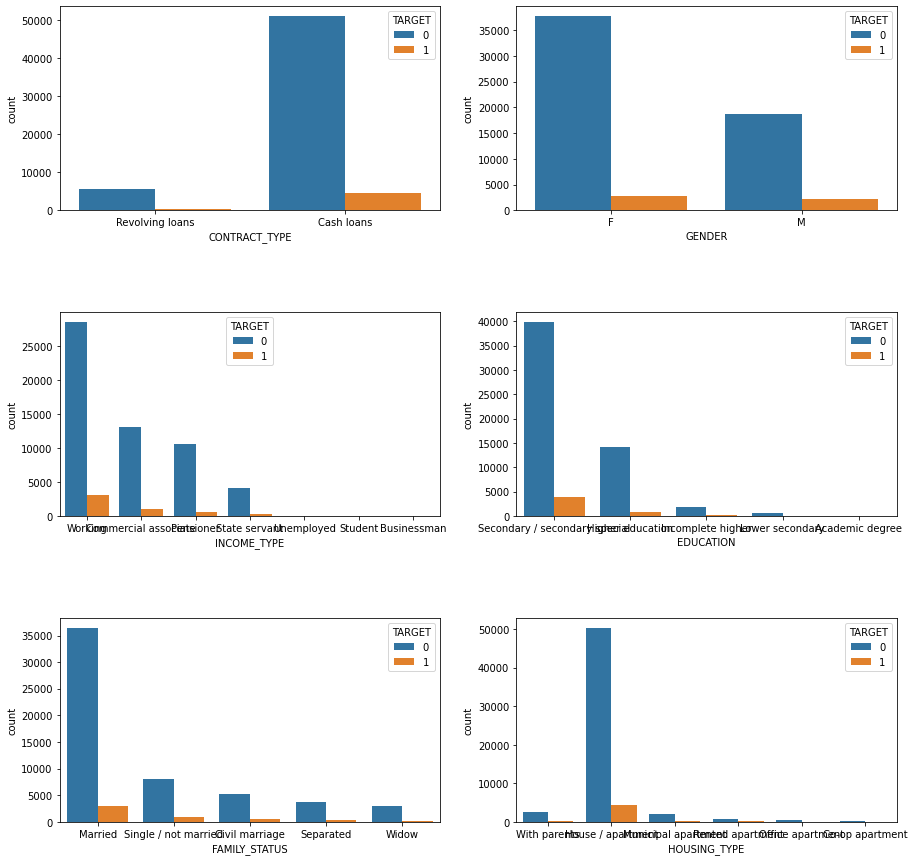

In [98]:
categorik = ['CONTRACT_TYPE','GENDER','INCOME_TYPE','EDUCATION','FAMILY_STATUS','HOUSING_TYPE']

fig,axes = plt.subplots(3,2,figsize=(15,15))
for idx,cat_col in enumerate(categorik):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=dataku,hue='TARGET',ax=axes[row,col])

plt.subplots_adjust(hspace=0.5)

7. APPROVED_CREDIT

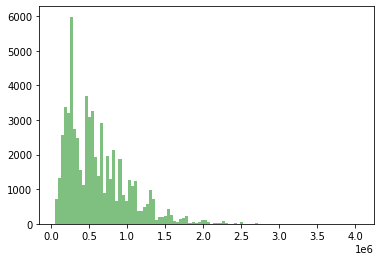

In [99]:
plt.hist(dataku['APPROVED_CREDIT'], bins=100, facecolor='g', alpha=0.5)
plt.show()

8. DAYS_AGE

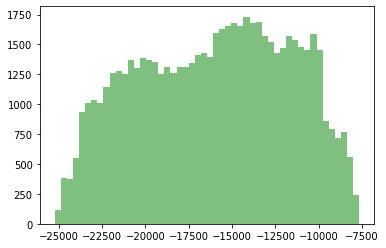

In [100]:
plt.hist(dataku['DAYS_AGE'], bins=50, facecolor='g', alpha=0.5)
plt.show()

9. DAYS_WORK

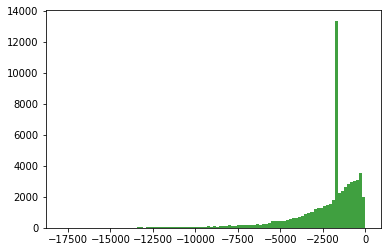

In [101]:
plt.hist(dataku['DAYS_WORK'], bins=100, facecolor='g', alpha=0.75)
plt.show()

Kenapa seperti itu karena pada langkah sebelumnya ketika terdapat nilai yang aneh 365243 kita menggantinya dengan nilai median yang membuat grafik dari tabel tersebut menjadi seperti itu

Yang selanjutnya saya akan melihat korelasi antar variabel numerik

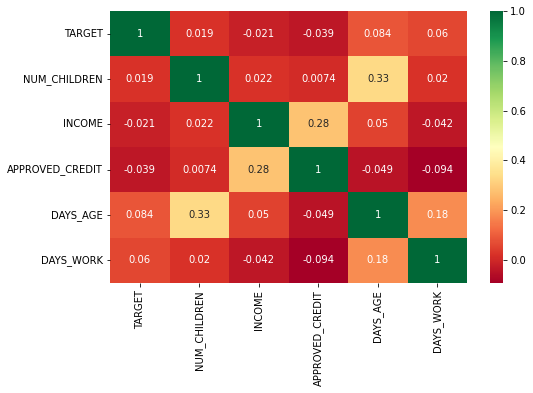

In [102]:
plt.subplots(figsize=(8, 5))
sns.heatmap(dataku.corr(), annot=True, cmap="RdYlGn")
plt.show()